In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding data

In [2]:
data = pd.read_csv('day.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Continous Variables Visualization

In [5]:
#dropping unnecessary columns:
#instant is having just serial numbers
#dteday as it has dates in months
#as cnt = casual + registered
data = data.drop(columns = ["instant", "dteday","casual","registered"])

In [6]:
# numerical data which is continous
data[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


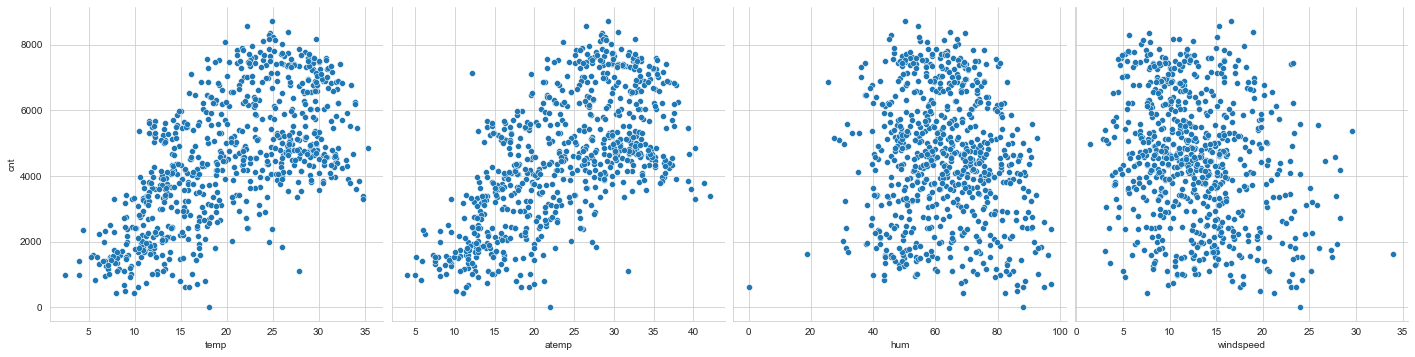

In [7]:
#scatteplot of continous data vs "cnt"
sns.set_style("whitegrid")
sns.pairplot(data=data,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',height=5);

- Here temperature and adjusted temperature are having similar trends
- Increase in temperature and adjusted temperature is increasing rentals count per day

## Dropping Outliers in continous variables

In [8]:
#outliers in temp
data = data.drop(index=data[(data['temp']>15) & (data['temp']<20) & (data['cnt']<100)].index)
data = data.drop(index=data[(data['temp']>25) & (data['temp']<30) & (data['cnt']<2000)].index)

#outliers in atemp
data = data.drop(index=data[(data['temp']>20) & (data['temp']<25) & (data['cnt']<100)].index)
data = data.drop(index=data[(data['temp']>35) & (data['temp']<35) & (data['cnt']<2000)].index)

#outliers in humidity
data = data.drop(index = data[(data['hum'] < 20)].index)

#outliers in windspeed
data = data.drop(index = data[(data['windspeed'] >30)].index)

                            

In [9]:
#correlation with continous variables
correlation = data[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].apply(lambda x: round(x,4))
correlation = pd.DataFrame(correlation).sort_values(by='cnt',ascending=False)
correlation.drop(index=['cnt'],inplace=True)

# dropping registered,casual, instant
correlation.style.background_gradient(cmap='Reds')

,cnt
atemp,0.638900
temp,0.635600
hum,-0.107600
windspeed,-0.218100


- adjusted temperature has the highest positive correlation with cnt.
- windspeed has the lowest correlation.

In [10]:
# correlation between temp and atemp
data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991726
atemp,0.991726,1.000000


- the correlation between temp and atemp is almost 1, one can be dropped.

In [11]:
#dropping atemp
data = data.drop(columns=['atemp'])

In [12]:
data[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000



 - There's no signifcant correlation between temp,hum and windspeed

In [13]:
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in cat_vars : 
    print('Unique values in ',i, data[i].unique())

Unique values in  season [1 2 3 4]
Unique values in  yr [0 1]
Unique values in  mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in  holiday [0 1]
Unique values in  weekday [6 0 1 2 3 4 5]
Unique values in  workingday [0 1]
Unique values in  weathersit [2 1 3]


## Categorical data

In [14]:
# Replacing numbers with labels 
season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { # considering the week starting from sunday
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

In [15]:
# replacing numerals with labels 
data['season'] = data['season'].replace(season_labels)
data['mnth'] = data['mnth'].replace(mnth_labels)
data['weekday'] = data['weekday'].replace(weekday_labels)
data['weathersit'] = data['weathersit'].replace(weathersit_labels)


In [16]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


## Dropping outliers in categorical variables

<AxesSubplot:>

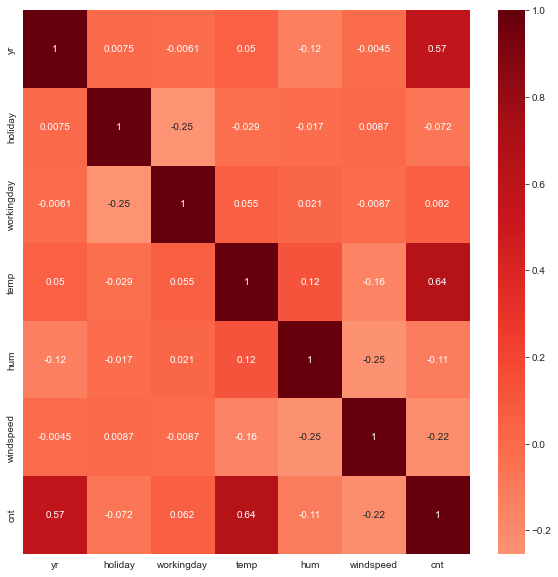

In [17]:
# data = data.drop(index = data[(data['season'] == 'spring') & (data['cnt'] > 7000)].index)
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),cmap='Reds',center=0,annot=True)

- Highest correlation seen in temp with cnt

## Data Preparation

In [18]:
# creating indicator variable columns
season_indicators = pd.get_dummies(data['season'],drop_first=True)
mnth_indicators = pd.get_dummies(data['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(data['weathersit'],drop_first=True)

In [19]:
# adding indicator variable columns to the dataset . Dropping original columns
data = pd.concat([data,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
data = data.drop(columns=['season','mnth','weekday','weathersit'])

In [20]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'cloudy', 'light snow/rain'],
      dtype='object')

## Splitting to testing and training data set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
dtrain,dtest = train_test_split(data,train_size=0.7,test_size=0.3,random_state=120)

## Scaling 

In [24]:
# normalization of continuous variables
from sklearn.preprocessing import MinMaxScaler 
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']

numerical_scaler.fit(dtrain[num_vars])
dtrain[num_vars] = numerical_scaler.transform(dtrain[num_vars])

In [25]:
y_train = dtrain.pop('cnt')
X_train = dtrain

In [26]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,august,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
16,0,1,0,0.147718,0.394431,0.379986,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
609,1,0,0,0.806971,0.780742,0.054518,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
272,0,0,1,0.639257,0.547564,0.411189,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
107,0,0,1,0.573859,0.401392,0.303720,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
720,1,0,0,0.261637,0.260440,0.914299,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
X_train.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'cloudy',
       'light snow/rain'],
      dtype='object')

In [28]:
y_train.head()


16     1000
609    5810
272    5202
107    3429
720    1749
Name: cnt, dtype: int64

## Modelling

In [29]:
# Selecting 15 Features using RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [30]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
17,1,True,november
16,1,True,may
26,1,True,cloudy
12,1,True,january
11,1,True,february
10,1,True,december
8,1,True,winter
13,1,True,july
27,1,True,light snow/rain


In [31]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'november', 'may', 'cloudy', 'january', 'february',
       'december', 'winter', 'july', 'light snow/rain', 'spring',
       'windspeed', 'hum', 'temp', 'holiday'], dtype=object)

In [32]:
# Following a stepwise elimination
import statsmodels.api as sm
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

- Using features selected by RFE : 'yr', 'Sunday', 'Saturday', 'november', 'january', 'december',
 'winter', 'july', 'spring', 'holiday', 'workingday', 'hum', 'temp',
 'windspeed', 'light snow/rain'

In [33]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     191.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          4.22e-194
Time:                        19:36:46   Log-Likelihood:                -4064.5
No. Observations:                 507   AIC:                             8161.
Df Residuals:                     491   BIC:                             8229.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2780.3279    241.245     

 - Dropping holiday because of high p-value


In [34]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.89e-192
Time:                        19:36:46   Log-Likelihood:                -4071.2
No. Observations:                 507   AIC:                             8172.
Df Residuals:                     492   BIC:                             8236.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2773.5918    244.202     

- Dropping Sunday because of high p-value

In [35]:
del_feature = 'Sunday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.89e-192
Time:                        19:36:46   Log-Likelihood:                -4071.2
No. Observations:                 507   AIC:                             8172.
Df Residuals:                     492   BIC:                             8236.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2773.5918    244.202     

In [36]:
del_feature = 'december'
selected_features = selected_features[selected_features!=del_feature]
final_model = ols_fit(y_train,X_train[selected_features])


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.3
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          2.42e-189
Time:                        19:36:46   Log-Likelihood:                -4081.4
No. Observations:                 507   AIC:                             8191.
Df Residuals:                     493   BIC:                             8250.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2521.4314    242.232     

In [37]:
del_feature = 'november'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     215.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.54e-187
Time:                        19:36:47   Log-Likelihood:                -4088.5
No. Observations:                 507   AIC:                             8203.
Df Residuals:                     494   BIC:                             8258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2377.7987    242.290     

In [38]:
final_model = ols_fit(y_train,X_train[selected_features])


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     215.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.54e-187
Time:                        19:36:47   Log-Likelihood:                -4088.5
No. Observations:                 507   AIC:                             8203.
Df Residuals:                     494   BIC:                             8258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2377.7987    242.290     

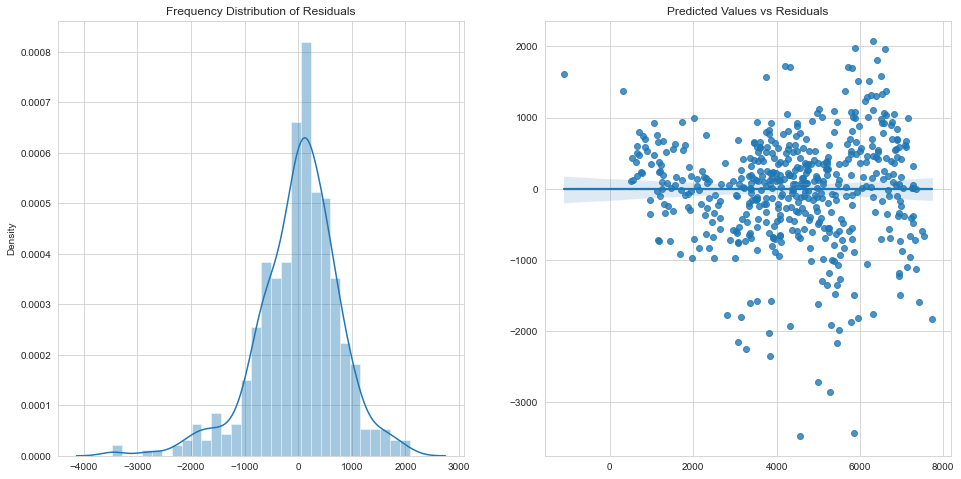

In [39]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()

## Prediction

In [40]:

y_test = dtest.pop('cnt')
X_test = dtest
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [41]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

## Model Evaluation

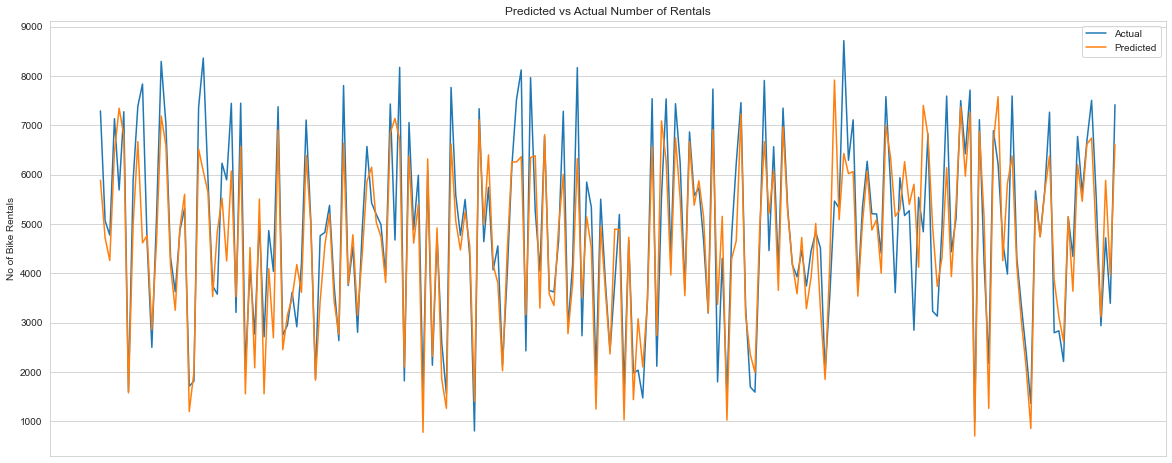

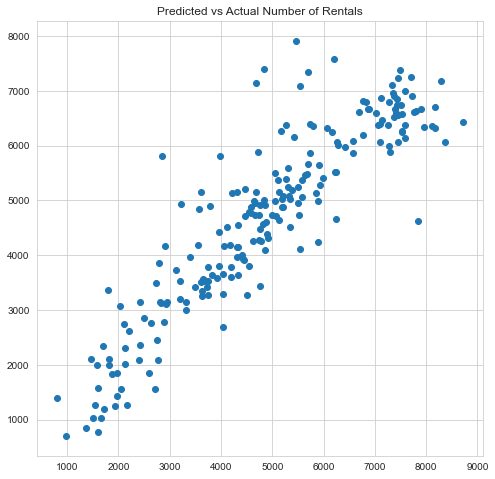

In [42]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual Number of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual Number of Rentals');

In [43]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.84
R-squared for test data: 0.79
Mean Squared Error 728133.858


In [44]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.80595458, 0.88481321, 0.77485327, 0.90384623, 0.87580772,
       0.83881089, 0.88438588, 0.64774745, 0.78303685, 0.82446619])

In [45]:
selected_features


array(['yr', 'may', 'cloudy', 'january', 'february', 'winter', 'july',
       'light snow/rain', 'spring', 'windspeed', 'hum', 'temp'],
      dtype=object)

In [46]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result



Intercept : [2377.79867175]


,MLR Coefficients
temp,4390.996057
yr,1955.417763
winter,555.688792
may,308.297584
february,-36.235602
january,-176.587281
cloudy,-323.083381
july,-665.864893
spring,-869.887844
windspeed,-1018.556440


# Conclusion

- Analysis is done using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by statistical significance of features and overall fit of the model. The 12 most significant features to understand demand have been reported.

- The data set is randomly divided into training and test data. Final Model built on training data set explains 84% of the variability and achieves 81% on test data.